## DİYABETİK RETİNOPATİ TEŞHİSİ

Diyabetik retinopatinin evreleri aşağıdaki gibidir:

1- Hafif Non-proliferatif Retinopati: Retina damarlarında, genellikle mikroanevrizmalar olarak adlandırılan küçük sakküler çıkıntılar mevcuttur. Bu mikroanevrizmalar, retina kılcal damarlarındaki endotel hücre disfonksiyonu sonucu oluşur ve retinal kapiller permeabilitenin artmasına neden olabilir. Görme kaybı genellikle bu aşamada belirgin değildir.

2- Orta Düzey Non-proliferatif Retinopati: Retina venüllerinde dilatasyon ve tortuosite artışı gözlenir. Retinal kılcal damarların oklüzyonu ve perisit kaybı belirgin hale gelir. İntra-retinal mikrodamar anomalileri (IRMA) ve noktasal hemorajiler görülebilir. Kan-retina bariyerinin bozulması sonucu eksüda birikimi oluşabilir.

3- Şiddetli Non-proliferatif Retinopati: Retinada yaygın kapiller oklüzyon ve iskemi mevcuttur. Bu durum retina içi mikrovasküler anormallikler (IRMA), yaygın mikroanevrizmalar, intraretinal kanamalar ve “cotton wool spot” olarak adlandırılan retina sinir lifi tabakasındaki lokalize ödem alanları ile karakterizedir. Bu aşamada, retina perfuzyonundaki bozulma nedeniyle iskemiye bağlı olarak neovaskülarizasyon riskinde artış gözlenir.

3- Proliferatif Retinopati: Retina yüzeyinde ve optik disk civarında neovaskülarizasyon gelişimi mevcuttur. Bu yeni damarlar zayıf ve anormal yapıda olup, vitreusa doğru uzanabilir ve vitreoretinal traksiyonlara neden olabilir. Vitreus içine kanama (hemovitre), fibrovasküler proliferasyon ve traksiyonel retina dekolmanı gibi komplikasyonlar görülebilir. Bu durum, ciddi görme kaybına veya körlüğe neden olabilir.

# 1. GÖRÜNTÜ İŞLEME AŞAMASI

In [3]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

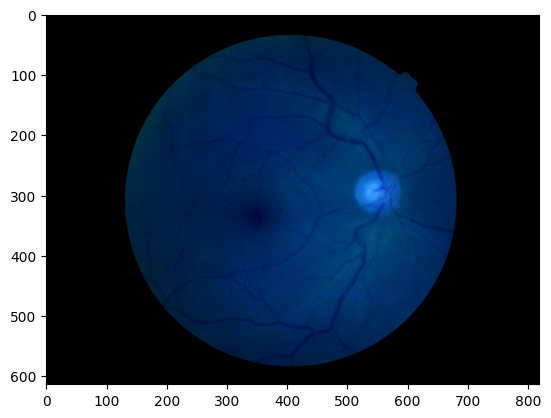

In [4]:
image = cv2.imread("0f23c3028206.png")
plt.imshow(image)

In [5]:
image.shape

(614, 819, 3)

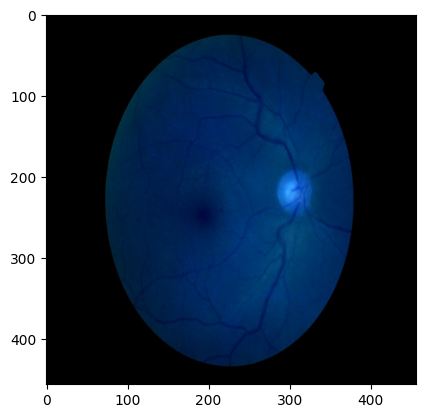

In [6]:
img = cv2.resize(image,(456,456))
plt.imshow(img)

COLOR_BGR2RGB

OpenCV, bir görüntüyü varsayılan olarak BGR (Mavi-Yeşil-Kırmızı) renk düzeninde okur. Ancak, birçok görüntü işleme algoritması ve diğer kütüphaneler RGB (Kırmızı-Yeşil-Mavi) renk düzenini kullanır. Bu nedenle, BGR formatını RGB formatına dönüştürmek gerekir.

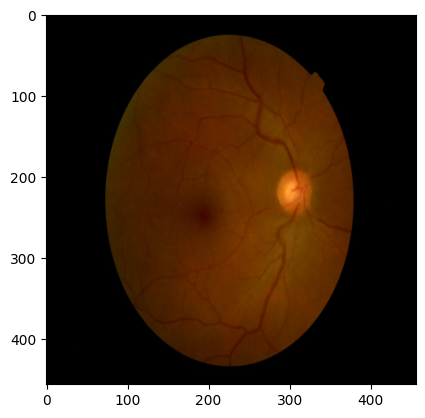

In [7]:
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(rgb)

COLOR_RGB2GRAY

Renkli bir görüntüyü gri tonlamalı bir görüntüye dönüştürür. Bu işlemde, her bir pikselin parlaklık değeri, renkli kanalların (Kırmızı, Yeşil, Mavi) belirli ağırlıklarla çarpılması sonucu elde edilir. Bu ağırlıklar genellikle insan gözünün renk hassasiyeti dikkate alınarak belirlenir.

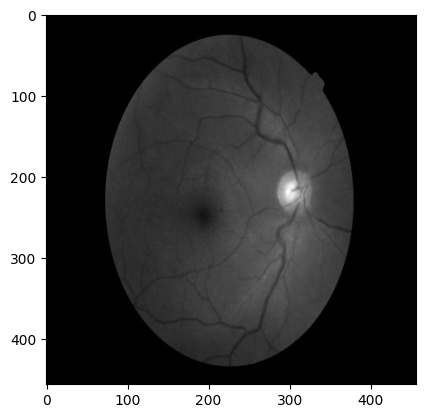

In [8]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap='gray')

In [9]:
# Gri tonlama ile boyut sayısı ikiye düşürülür.
gray.shape 

(456, 456)

GaussianBlur

Görüntüdeki yüksek frekanslı bileşenleri (örneğin, gürültü veya ani parlaklık değişimleri) yumuşatmak için kullanılan bir bulanıklaştırma yöntemidir. Gauss çekirdeği kullanılarak her bir pikselin değeri, çevresindeki piksellerin ağırlıklı ortalaması alınarak güncellenir.

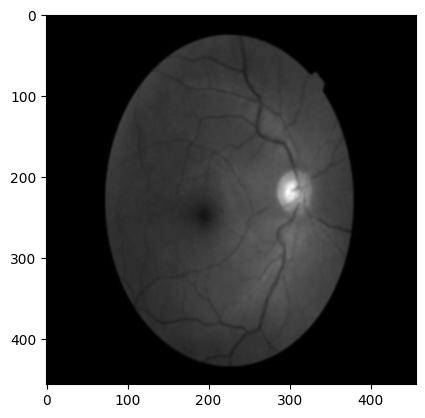

In [10]:
blur = cv2.GaussianBlur(gray,(5,5),0)
plt.imshow(blur,cmap='gray')

Threshold

Görüntüdeki pikselleri belirli bir eşik değerine göre iki gruba ayırır. Görüntüdeki her bir piksel bu değere göre değerlendirilir. Eğer bir pikselin değeri bu eşik değerinden küçükse, 0 (siyah) olarak atanır. Eşik değerinden büyükse, 255 (beyaz) olarak atanır.

- cv2.threshold fonksiyonu iki değeri döndürür:  
İlk dönen değer, kullanılan eşik değeridir.  
İkinci dönen değer ise, eşikleme sonucu elde edilen ikili görüntüdür.  
[1] kullanımı ile bu dönen değerden ikinci değeri (ikili görüntüyü) alır ve thresh değişkenine atar.

In [11]:
thresh = cv2.threshold(blur,10,255, cv2.THRESH_BINARY)[1]

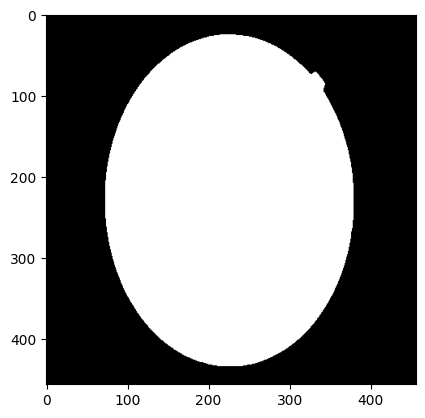

In [12]:
plt.imshow(thresh, cmap='gray')

findContours   
Görüntüdeki konturları (nesne kenarlarını) bulmak için kullanır.

.copy(): thresh görüntüsünün bir kopyasını oluşturur. cv2.findContours fonksiyonu orijinal görüntüyü değiştirebileceği için copy() kullanarak bir kopya üzerinde işlem yapılır ve orijinal görüntü korunmuş olur.

cv2.RETR_EXTERNAL:   
Kontur bulma modunu belirler. RETR_EXTERNAL, sadece en dıştaki (dış kenar) konturları bulur ve iç içe geçmiş (iç konturlar) konturları göz ardı eder.

CHAIN_APPROX_SIMPLE, konturu oluşturan noktaları sadeleştirir ve sadece gerekli olan köşe noktalarını tutar. Örneğin, bir dikdörtgenin tüm kenar noktalarını değil, sadece dört köşe noktasını tutar.

In [13]:
kontur = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

## Görüntü üzerindeki en uç noktaları belirleme kodu

In [14]:
kontur

((array([[[214,  25]],
  
         [[213,  26]],
  
         [[207,  26]],
  
         ...,
  
         [[242,  26]],
  
         [[234,  26]],
  
         [[233,  25]]], dtype=int32),),
 array([[[-1, -1, -1, -1]]], dtype=int32))

In [15]:
kontur = kontur[0][0]

In [16]:
kontur.shape

(510, 1, 2)

In [35]:
kontur = kontur[:,0,:]

In [37]:
kontur.shape

(510, 2)

In [39]:
kontur

array([[214,  25],
       [213,  26],
       [207,  26],
       ...,
       [242,  26],
       [234,  26],
       [233,  25]], dtype=int32)

In [41]:
kontur[:,0].argmax()

373

In [43]:
kontur[373]

array([378, 253], dtype=int32)

In [45]:
kontur[:,0].argmin()

125

In [47]:
kontur[125]

array([ 73, 205], dtype=int32)

In [49]:
sol = tuple(kontur[kontur[:,0].argmin()])
sağ = tuple(kontur[kontur[:,0].argmax()])
üst = tuple(kontur[kontur[:,1].argmin()])
alt = tuple(kontur[kontur[:,1].argmax()])

In [51]:
sol, sağ, üst, alt

((73, 205), (378, 253), (214, 25), (211, 433))

In [57]:
x1 = sol[0]
y1 = üst[1]
x2 = sağ[0]
y2 = alt[1]

In [59]:
x1, y1, x2, y2

(73, 25, 378, 433)

## Orijinal Resim

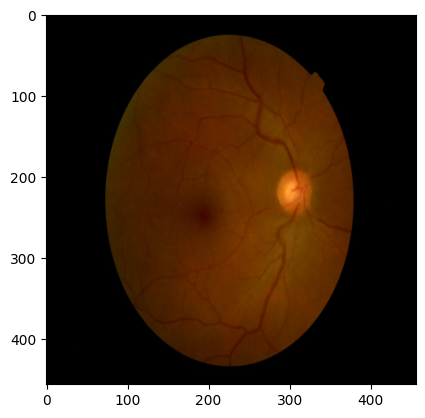

In [77]:
orijinal = rgb.copy()
plt.imshow(orijinal)

## Kontur Uygulanmış Resim

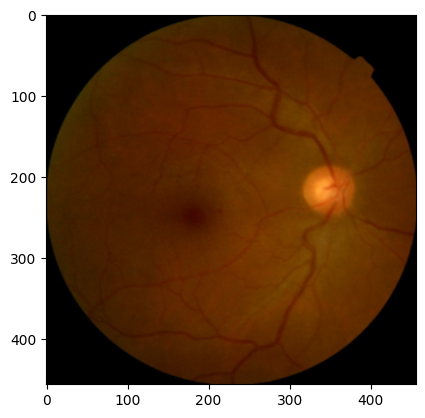

In [79]:
kntr = orijinal[y1:y2 , x1:x2]
kntr = cv2.resize(kntr,(456,456))
plt.imshow(kntr)

## Kenardaki siyahlık veriler gereksiz olduğu için her resim için eşik değer oluşturup tekrar bir kırpma yaptık.

In [81]:
x = int(x2-x1)*4//100
y = int(y2-y1)*5//100

In [83]:
x,y

(12, 20)

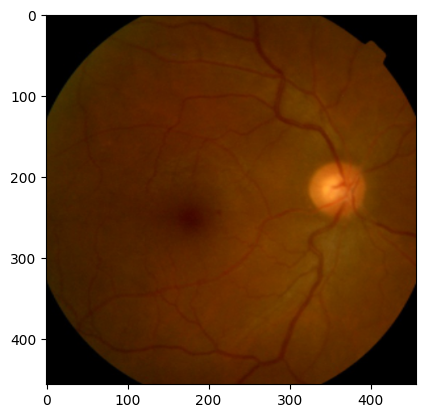

In [85]:
kntr2 = orijinal[y1+y : y2-y , x1+x : x2-x]
kntr2 = cv2.resize(kntr2,(456,456))
plt.imshow(kntr2)

## CLAHE - Kontrast Limitli Adaptif Histogram Eşitleme


CLAHE uygulamak için renk kanalını RGB'den LAB'a çeviriyoruz. 

CLAHE (Contrast Limited Adaptive Histogram Equalization), görüntü işlemede kullanılan ve Adaptive Histogram Equalization (AHE) metodunun geliştirilmiş bir versiyonudur. CLAHE, özellikle görüntüdeki kontrastı artırmak ve daha iyi bir görselleştirme sağlamak amacıyla kullanılır. Görüntüdeki ışık dengesizliklerini düzelterek daha net ve detaylı görüntüler elde etmeye olanak tanır.

Histogram Eşitleme Nedir?
Histogram eşitleme, bir görüntünün parlaklık dağılımını (histogramını) genişletmek ve daha homojen hale getirmek için kullanılan bir tekniktir.
Amaç: Görüntünün kontrastını artırmak ve tüm parlaklık seviyelerinin daha dengeli bir şekilde temsil edilmesini sağlamak.

In [91]:
lab = cv2.cvtColor(kntr2, cv2.COLOR_RGB2LAB)

In [93]:
lab.shape

(456, 456, 3)

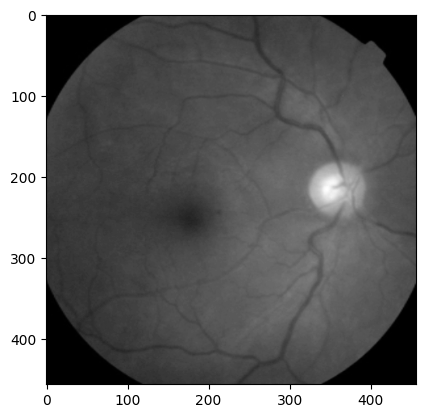

In [95]:
l,a,b = cv2.split(lab)
plt.imshow(l, cmap='gray')

In [97]:
l.shape

(456, 456)

In [99]:
fltn = l.flatten()

In [101]:
fltn.shape

(207936,)

matplotlib kütüphanesi kullanılarak bir görüntü veya veri dizisinin histogramını oluşturur ve ekranda gösterir. 
Histogram, verinin dağılımını ve frekansını görselleştirmek için kullanılan bir grafiktir.

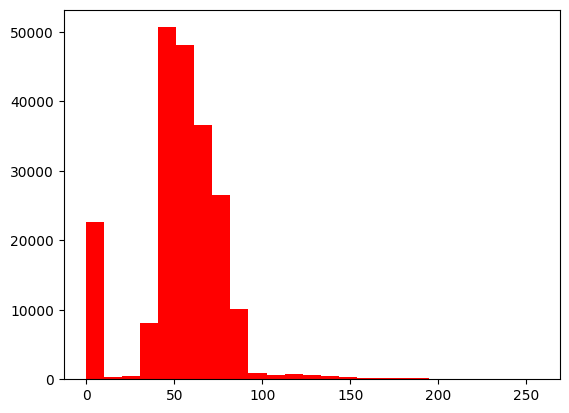

In [103]:
plt.hist(fltn,25,[0,256], color = 'b')
plt.show()

cv2.createCLAHE():   
OpenCV'nin CLAHE (Kontrast Limitli Adaptif Histogram Eşitleme) işlemi için kullanılan fonksiyonudur. Bu fonksiyon, CLAHE işlemini uygulayacak bir nesne oluşturur.  
clahe.apply(l): CLAHE işlemini l değişkeniyle belirtilen gri tonlamalı görüntüye uygular.

In [105]:
clahe = cv2.createCLAHE(clipLimit=7.0,tileGridSize=((8,8)))
cl = clahe.apply(l)

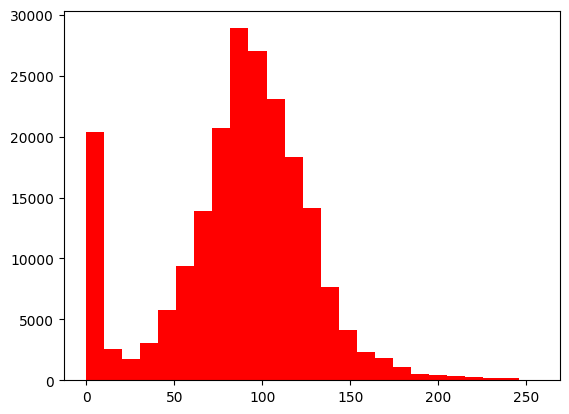

In [107]:
plt.hist(cl.flatten(),25,[0,256], color = 'b')
plt.show()

## CLAHE uygulanmış hali

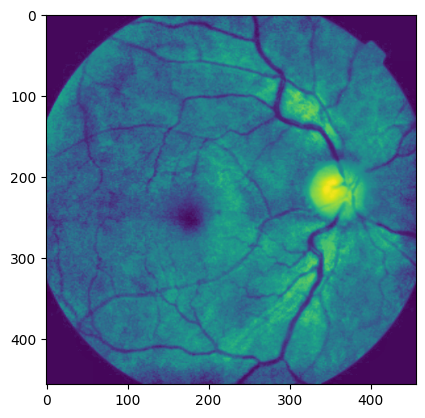

In [109]:
plt.imshow(cl)

## CLAHE uygulanmamış hali

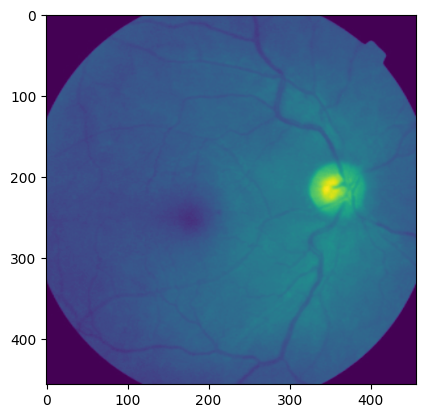

In [114]:
plt.imshow(l)

CLAHE işlemi uyguladığımız katmanı, diğer katmanlarla birleştirip tekrardan görüntümüzü RGB yapıyoruz.

In [117]:
limg = cv2.merge((cl,a,b))

In [119]:
son = cv2.cvtColor(limg, cv2.COLOR_LAB2RGB)

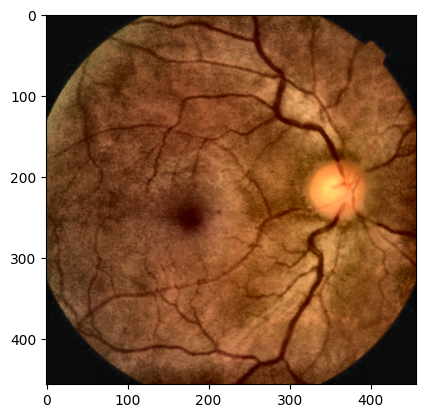

In [121]:
plt.imshow(son)

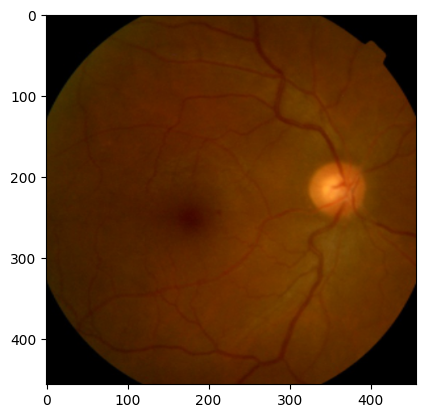

In [123]:
plt.imshow(kntr2)

Medyan Bulanıklaştırma Nedir?  
Medyan bulanıklaştırma, her bir pikseli ve komşu piksellerini (kerneldeki diğer pikseller) alarak bu piksellerin medyan değerini (ortanca değer) hesaplar ve merkezi pikseli bu medyan değerle değiştirir.  
Özellikle rastgele noktalar halinde olan gürültüleri azaltmada etkilidir. Çünkü medyan değer, aşırı büyük veya küçük piksel değerlerinin etkisinde kalmaz.  
Medyan bulanıklaştırma, kenarları korur. Kenarları yumuşatmadan gürültüyü azaltır, bu nedenle kenar tespiti gibi işlemlerden önce sıkça kullanılır.

## Median Blur

In [138]:
med_son = cv2.medianBlur(son, 3)

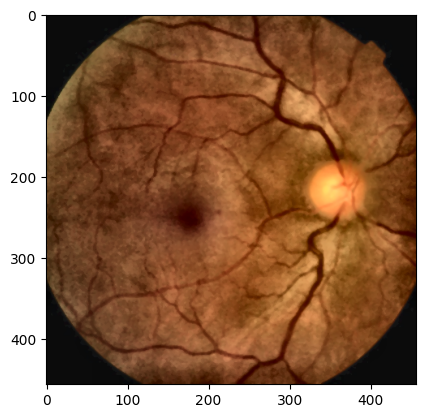

In [140]:
plt.imshow(med_son)

In [146]:
arka_plan = cv2.medianBlur(son, 37)

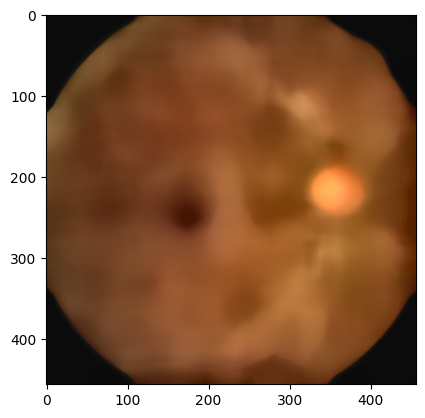

In [148]:
plt.imshow(arka_plan)

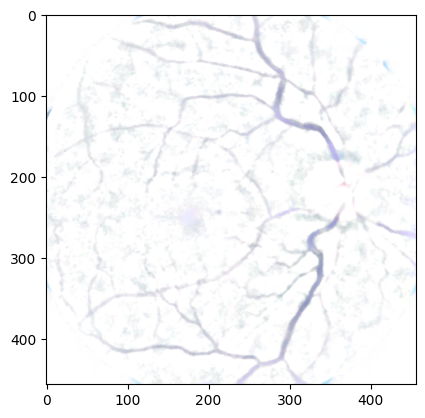

In [150]:
maske = cv2.addWeighted(med_son,1,arka_plan,-1,255)
plt.imshow(maske)

In [152]:
son_img = cv2.bitwise_and(maske,med_son)

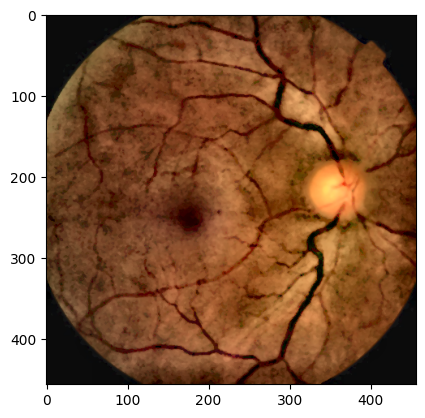

In [154]:
plt.imshow(son_img)

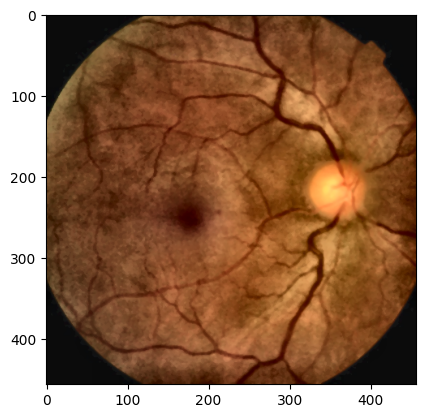

In [156]:
plt.imshow(med_son)